Given measurements of all the disk and binary parameters, calculate the uncertainty in $\theta$.

In [4]:
# code here
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table

deg = np.pi/180.0

def calc_theta(i_disk, Omega_disk, i_star, Omega_star):
    '''
    Calculate the mutual inclination between two planes. Assumes all inputs in degrees.
    '''
    
    cos_theta = np.cos(i_disk * deg) * np.cos(i_star * deg) + \
        np.sin(i_disk * deg) * np.sin(i_star * deg) * np.cos((Omega_disk - Omega_star) * deg)
    theta = np.arccos(cos_theta)/deg
    
    return theta

Generate random samples from measurements of these values and then calculate the mutual inclination distribution and the uncertainties on them.

In [7]:
# the disks in the Kennedy sample have the following measurement uncertainties.
rows = [["HD 131511", 90, 10, 245, 5, 93.4, 4.2, 248, 3.6],
    ["alpha CrB", 90, 10, 345, 20, 88.2, 0.1, 330, 20],
    ["beta Tri", 130, 10, 247, 10, 130.0, 0.5, 245.2, 0.67]]

labels = ["name", "id", "id_err", "Od", "Od_err", "is", "is_err", "Os", "Os_err"]
                 
table = Table(rows=rows, names=labels)
table

name,id,id_err,Od,Od_err,is,is_err,Os,Os_err
str9,int64,int64,int64,int64,float64,float64,float64,float64
HD 131511,90,10,245,5,93.4,4.2,248.0,3.6
alpha CrB,90,10,345,20,88.2,0.1,330.0,20.0
beta Tri,130,10,247,10,130.0,0.5,245.2,0.67


In [37]:
N = 10000
def analyze_system(r):
    i_disk = np.random.normal(loc=r["id"], scale=r["id_err"], size=N)
    O_disk = np.random.normal(loc=r["Od"], scale=r["Od_err"], size=N)
    i_star = np.random.normal(loc=r["is"], scale=r["is_err"], size=N)
    O_star = np.random.normal(loc=r["Os"], scale=r["Os_err"], size=N)
    
    theta = calc_theta(i_disk, O_disk, i_star, O_star)
    
    # make a histogram 
    fig, ax = plt.subplots(nrows=2, sharex=True)
    heights, bin_edges, patches = ax[0].hist(theta, bins=40, density=True)
    ax[0].set_title(r["name"])
    
    # calculate the 68% upper limit and print and label it
    # do this for the actual distribution
    dx = bin_edges[1] - bin_edges[0]
    tot_prob = np.cumsum(heights * dx)
    ax[1].plot(bin_edges[1:], tot_prob)
    ind = np.searchsorted(tot_prob, 0.683)
    val = bin_edges[1:][ind]
    print("68%: {:.2f}".format(val))
    ax[0].axvline(val, color="k")

68%: 14.74


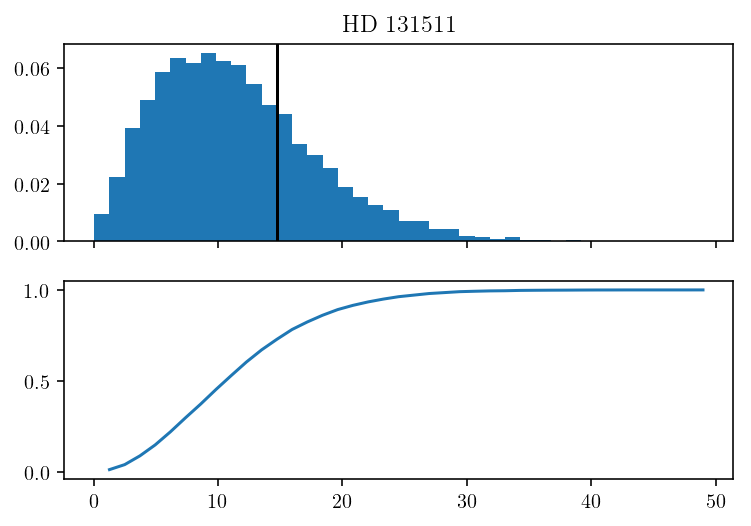

In [38]:
analyze_system(table[0])

68%: 35.57


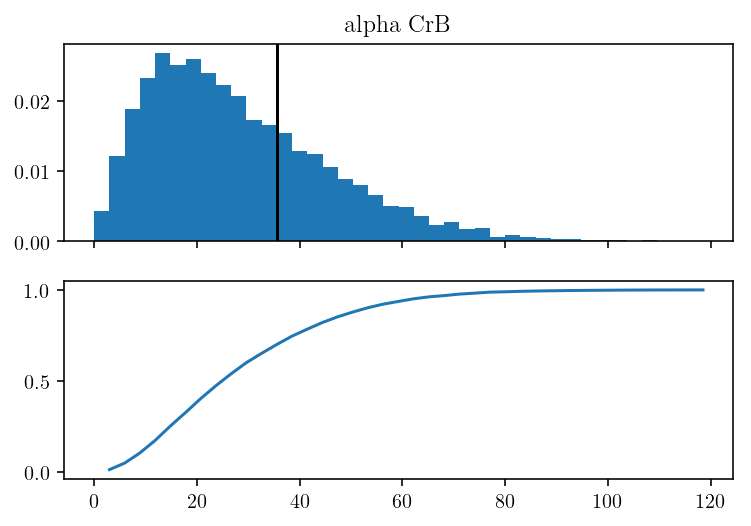

In [39]:
analyze_system(table[1])

68%: 13.75


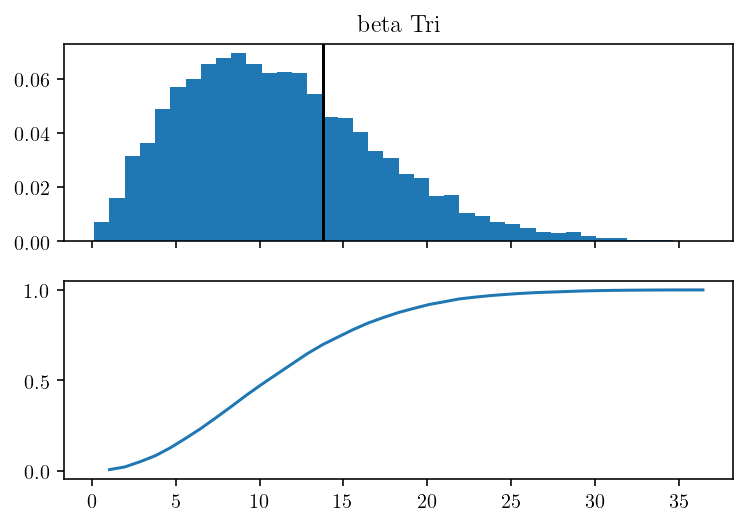

In [40]:
analyze_system(table[2])